# tests to retrieve the openEO processed habitat map via UDP
This scripts shows how to paramaterize the UDP to retrieve the habitat map from openEO for given year, topology, topology level. <br>
<br>

In [1]:
import openeo

In [2]:
# additional imports for visualization and checks
import rasterio
from rasterio.plot import show

In [3]:
# establish connection to OpenEO and authenticate
connection = openeo.connect("openeo.dataspace.copernicus.eu").authenticate_oidc()

Authenticated using refresh token.


In [4]:
# specify the geometry --> here Slovak Kast Area
polygon =  {"type": "Polygon", 
            "coordinates": [
                [[20.5846406, 48.884577], [21.2011633, 48.884577], [21.2011633, 48.47623], [20.5846406, 48.47623], [20.5846406, 48.884577]
            ]]
           }

## get the habitat map in EPSG:4326

In [5]:
cube = connection.datacube_from_process(
    process_id="udp_inference_module_alpha0",
    namespace="https://raw.githubusercontent.com/ESA-WEED-project/OpenEO-UDP-UDF-catalogue/refs/heads/main/UDP/json/udp_inference_module_alpha0.json",
    geometry=polygon,
    year=2021,
    topology='EUNIS2012',
    topology_level=3,
    target_epsg=4326,
    target_res=0.000090
    )

In [6]:
# since the result is a single file we do not need a batch job - synchronous request
%time cube.download(r'./SK_habitat_map_L3_10m_EPSG4326.tif')

CPU times: total: 93.8 ms
Wall time: 1min 55s


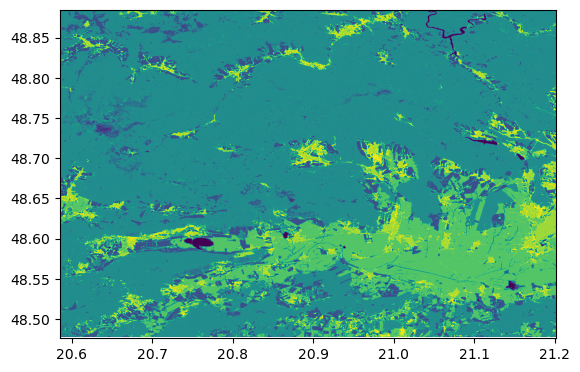

In [7]:
# visu result
with rasterio.open("SK_habitat_map_L3_10m_EPSG4326.tif") as src:
    show(src)

## get the map in EPSG:3035

In [8]:
cube = connection.datacube_from_process(
    process_id="udp_inference_module_alpha0",
    namespace="https://raw.githubusercontent.com/ESA-WEED-project/OpenEO-UDP-UDF-catalogue/refs/heads/main/UDP/json/udp_inference_module_alpha0.json",
    geometry=polygon,
    year=2021,
    topology='EUNIS2012',
    topology_level=2,
    target_epsg=3035,
    target_res=10
    )

In [ ]:
%time cube.download(r'./SK_habitat_map_L3_10m_EPSG3035.tif')

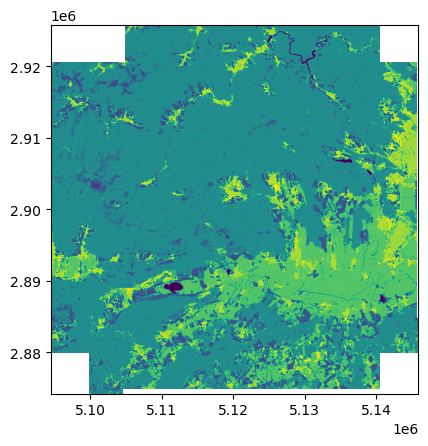

In [15]:
# visu result
with rasterio.open("SK_habitat_map_L3_10m_EPSG3035.tif") as src:
    show(src)